1. Introduction and Setup

✓ Dataset loaded successfully!
COMPREHENSIVE DATA EXPLORATION REPORT

1. DATASET OVERVIEW

Dataset Shape: 1000 rows × 8 columns
Memory Usage: 0.06 MB

--- First 5 Rows ---
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

--- Last 5 Rows ---
     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_B

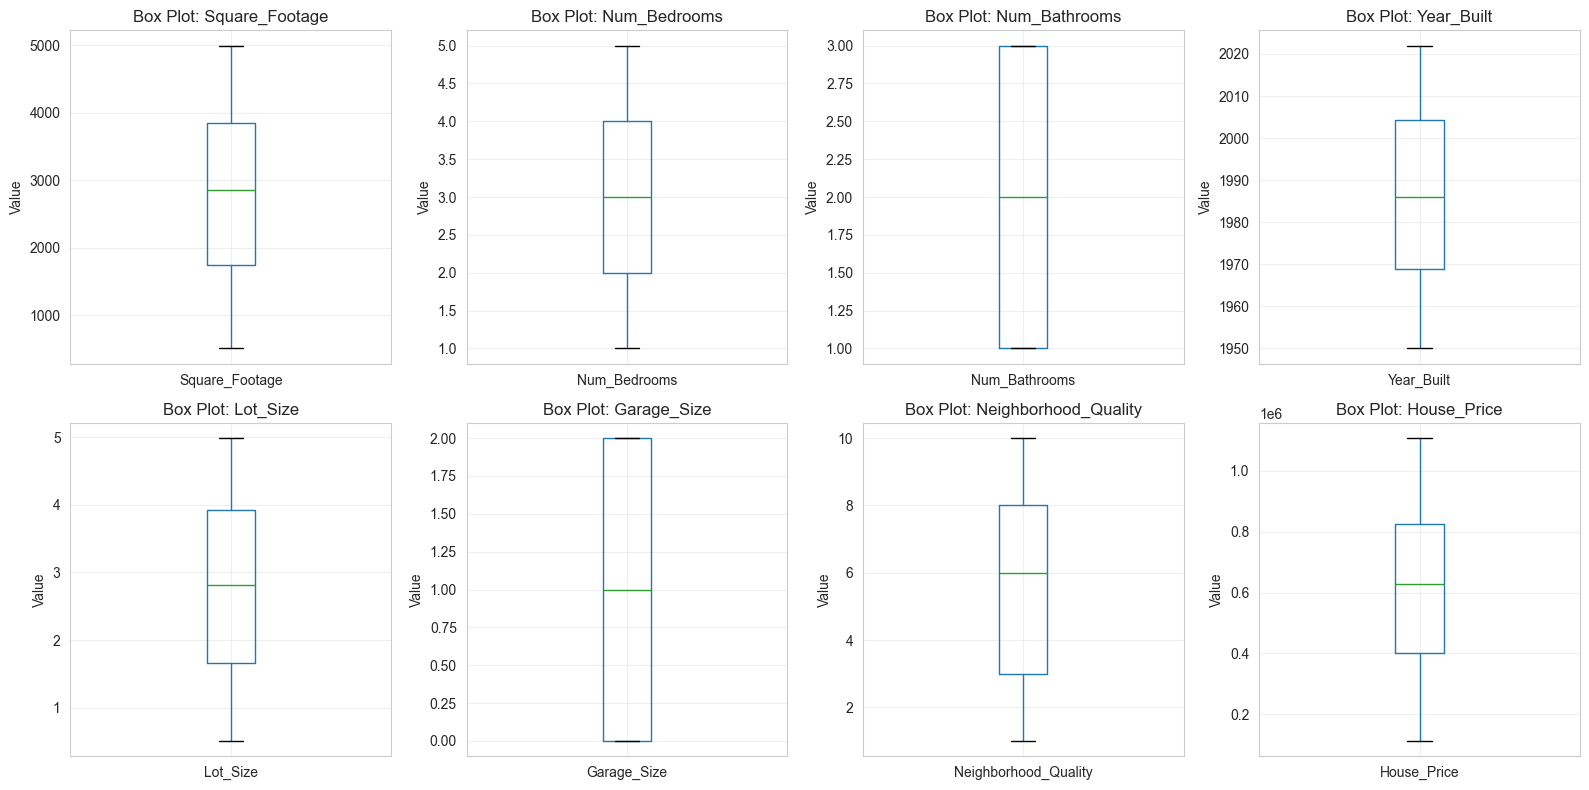

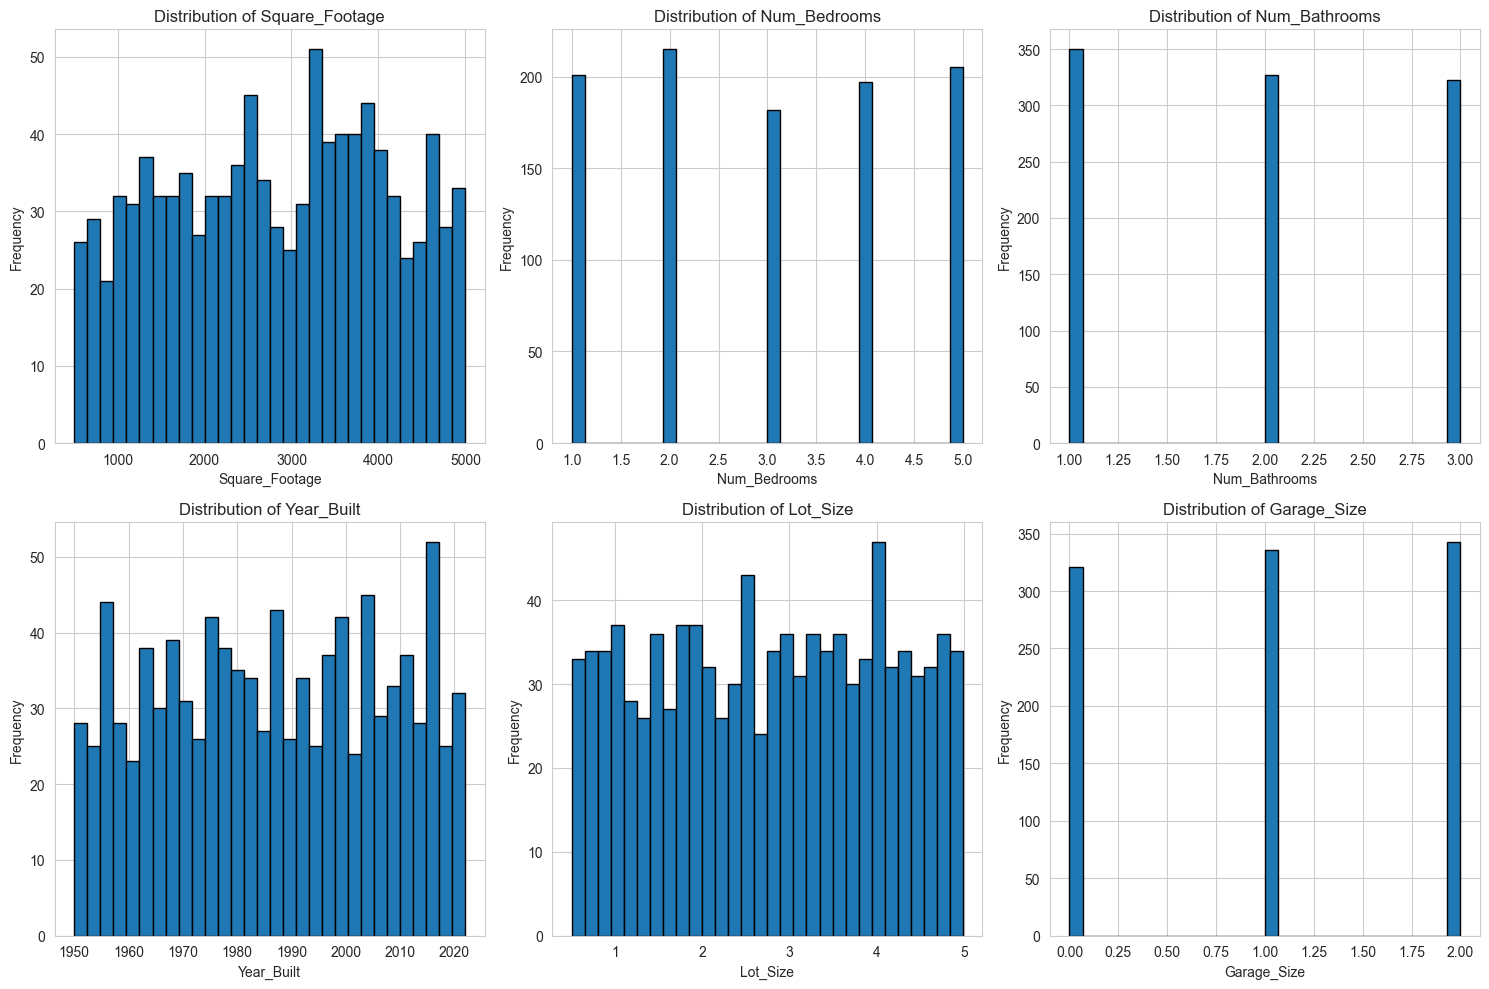


6. CATEGORICAL FEATURES ANALYSIS

✓ No categorical columns found in the dataset.

7. CORRELATION ANALYSIS (Numerical Features)

--- Highly Correlated Feature Pairs (|correlation| > 0.7) ---
     Feature_1   Feature_2  Correlation
Square_Footage House_Price     0.991261


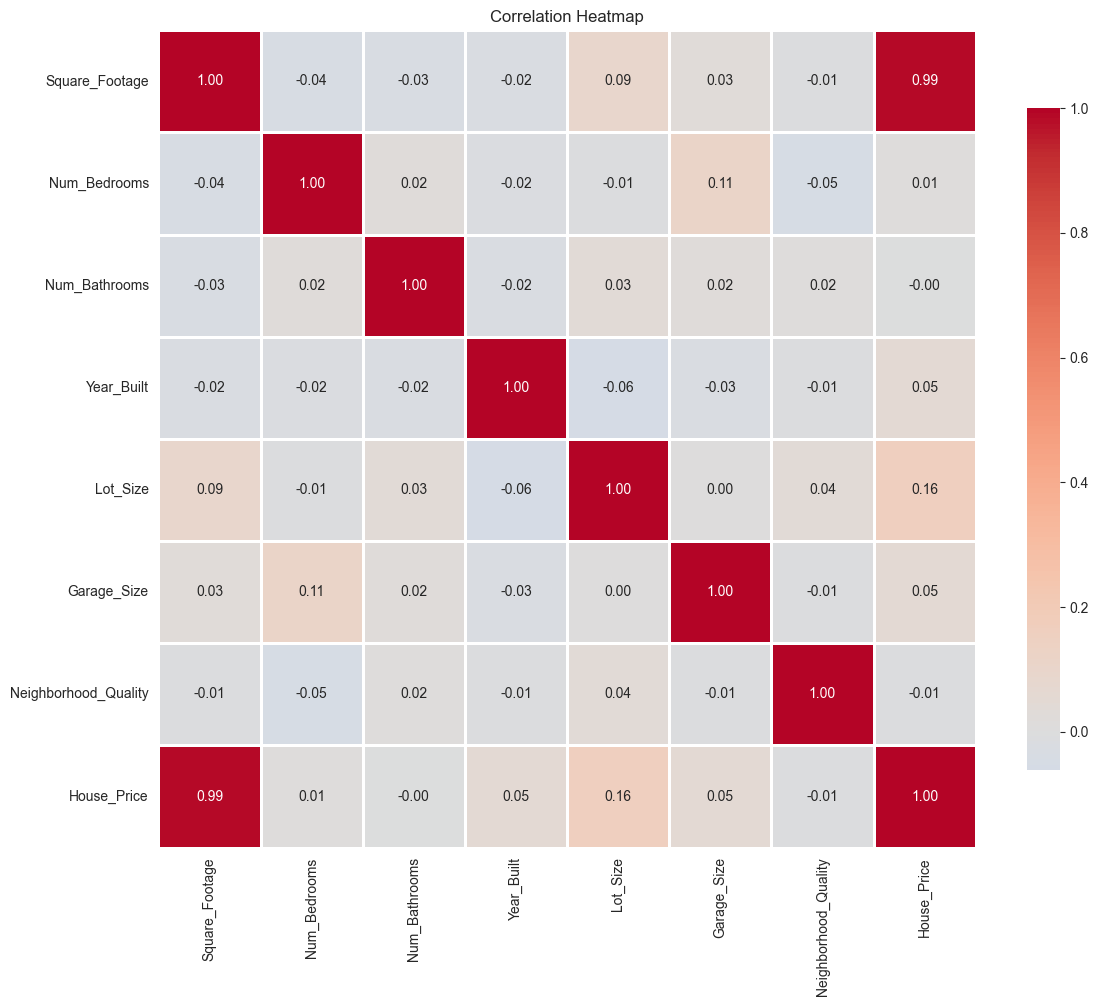


8. TREND ANALYSIS

⚠️  No target variable detected. Showing general trends...

--- Pairwise Relationships (Top 5 Features) ---


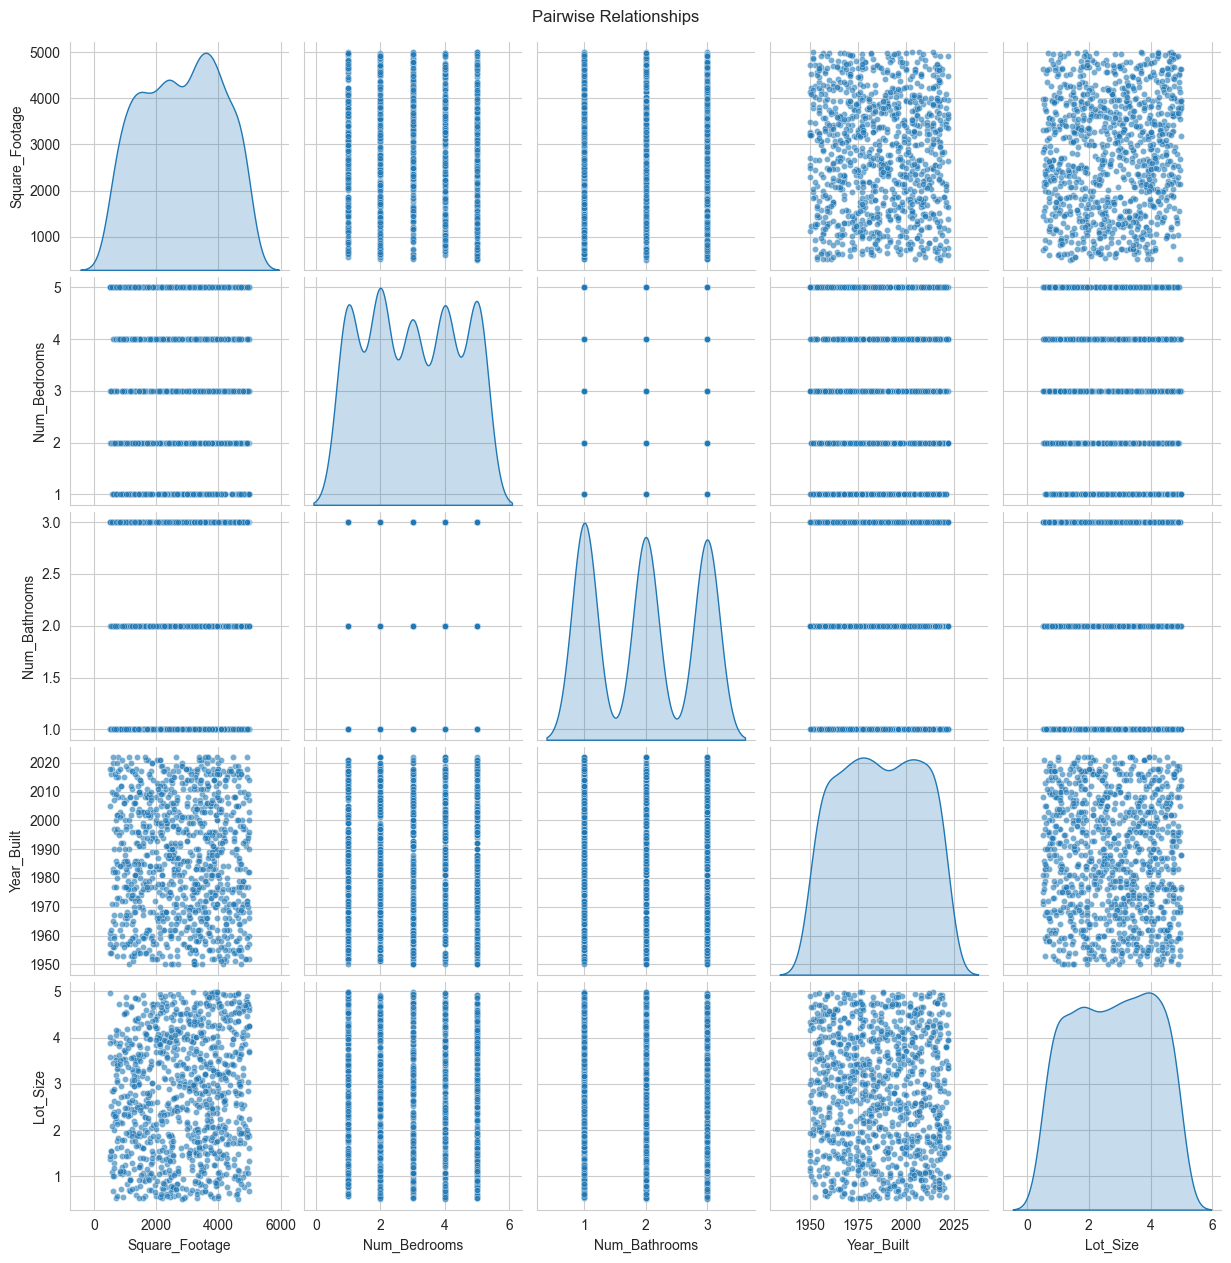


9. DATA QUALITY CHECKS

✓ No constant columns found

📌 Potential ID columns (unique for each row): ['Lot_Size', 'House_Price']

END OF COMPREHENSIVE DATA EXPLORATION REPORT


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
try:
    df = pd.read_csv('house_price_regression_dataset.csv')
    print("✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'house_price_regression_dataset.csv' not found. Please check the file path.")
    data = {'LotFrontage': [65, 80, np.nan], 'SalePrice': [208500, 181500, 223500]}
    df = pd.DataFrame(data)

print("=" * 80)
print("COMPREHENSIVE DATA EXPLORATION REPORT")
print("=" * 80)

# ============================================================================
# 1. DATASET OVERVIEW
# ============================================================================
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())
print("\n--- Random Sample (5 rows) ---")
print(df.sample(min(5, len(df)), random_state=42))

# ============================================================================
# 2. DATA TYPES & STRUCTURE
# ============================================================================
print("\n" + "=" * 80)
print("2. DATA TYPES & STRUCTURE")
print("=" * 80)

print("\n--- Column Data Types ---")
print(df.dtypes.value_counts())
print("\n--- Detailed Info ---")
df.info()

# Identify column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n📊 Numeric Columns ({len(numeric_cols)}): {numeric_cols[:10]}{'...' if len(numeric_cols) > 10 else ''}")
print(f"📝 Categorical Columns ({len(categorical_cols)}): {categorical_cols[:10]}{'...' if len(categorical_cols) > 10 else ''}")
print(f"📅 DateTime Columns ({len(datetime_cols)}): {datetime_cols}")

# ============================================================================
# 3. MISSING VALUES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("3. MISSING VALUES ANALYSIS")
print("=" * 80)

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️  Total columns with missing values: {len(missing_df)}")
    print(f"⚠️  Total missing values: {missing_counts.sum()}")
    print(f"⚠️  Percentage of dataset with any missing: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")
    print("\n--- Missing Values Summary ---")
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    if len(missing_df) <= 20:
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df['Column'], missing_df['Missing_Percent'])
        plt.xlabel('Missing Percentage (%)')
        plt.title('Missing Values by Column')
        plt.tight_layout()
        plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

print("\n" + "=" * 80)
print("4. DUPLICATE ROWS ANALYSIS")
print("=" * 80)

# Check for exact duplicates (all columns)
duplicates_all = df.duplicated().sum()
print(f"\n📊 Exact duplicates (all columns): {duplicates_all}")

if duplicates_all > 0:
    print(f"   Percentage: {(duplicates_all / len(df)) * 100:.2f}%")
    print("\n--- Sample Duplicate Rows (showing all instances) ---")
    duplicate_mask = df.duplicated(keep=False)
    print(df[duplicate_mask].sort_values(by=df.columns.tolist()).head(10))
    
    print("\n--- First Occurrence vs Duplicates ---")
    print(f"   First occurrences: {(~df.duplicated(keep='first')).sum()}")
    print(f"   Duplicate occurrences:s {df.duplicated(keep='first').sum()}")
else:
    print("   ✓ No exact duplicate rows found!")

# Check for duplicates based on subset of columns (excluding potential ID columns)
potential_ids = [col for col in df.columns if df[col].nunique() == len(df)]
if potential_ids:
    non_id_cols = [col for col in df.columns if col not in potential_ids]
    if non_id_cols:
        duplicates_subset = df.duplicated(subset=non_id_cols).sum()
        print(f"\n📊 Duplicates (excluding ID columns {potential_ids}): {duplicates_subset}")
        if duplicates_subset > 0:
            print(f"   Percentage: {(duplicates_subset / len(df)) * 100:.2f}%")
            print(f"   ⚠️  These rows have identical values except for ID columns")


# ============================================================================
# 5. NUMERICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("5. NUMERICAL FEATURES ANALYSIS")
print("=" * 80)

if len(numeric_cols) > 0:
    print("\n--- Descriptive Statistics ---")
    print(df[numeric_cols].describe().T)
    
    # Additional statistics
    print("\n--- Advanced Statistics ---")
    adv_stats = pd.DataFrame({
        'Column': numeric_cols,
        'Median': df[numeric_cols].median(),
        'Mode': df[numeric_cols].mode().iloc[0] if len(df[numeric_cols].mode()) > 0 else np.nan,
        'Skewness': df[numeric_cols].apply(lambda x: skew(x.dropna())),
        'Kurtosis': df[numeric_cols].apply(lambda x: kurtosis(x.dropna())),
        'Range': df[numeric_cols].max() - df[numeric_cols].min(),
        'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
        'CV(%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100).round(2)
    })
    print(adv_stats.to_string(index=False))
    
    # ========================================================================
    # ENHANCED OUTLIER DETECTION (IQR Method) - FIXED
    # ========================================================================
    print("\n--- Outlier Detection (IQR Method) ---")
    outlier_summary = []
    
    for col in numeric_cols:
        # Drop NaN values for calculation
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers_lower = (col_data < lower_bound).sum()
            outliers_upper = (col_data > upper_bound).sum()
            total_outliers = outliers_lower + outliers_upper
            
            if total_outliers > 0:
                outlier_summary.append({
                    'Column': col,
                    'Total_Outliers': total_outliers,
                    'Lower_Outliers': outliers_lower,
                    'Upper_Outliers': outliers_upper,
                    'Outlier_Pct': round((total_outliers / len(col_data)) * 100, 2),
                    'Lower_Bound': round(lower_bound, 2),
                    'Upper_Bound': round(upper_bound, 2)
                })
    
    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary).sort_values('Total_Outliers', ascending=False)
        print(outlier_df.to_string(index=False))
    else:
        print("✓ No outliers detected in any numeric column")
    
    # ========================================================================
    # BOX PLOTS FOR OUTLIER VISUALIZATION
    # ========================================================================
    print("\n--- Generating Box Plots for Outlier Visualization ---")
    
    # Select columns with outliers or top numeric columns
    cols_to_plot = [item['Column'] for item in outlier_summary[:8]] if outlier_summary else numeric_cols[:8]
    
    if len(cols_to_plot) > 0:
        n_cols = min(4, len(cols_to_plot))
        n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.ravel() if n_rows > 1 else axes
        
        for idx, col in enumerate(cols_to_plot):
            if idx < len(axes):
                ax = axes[idx]
                df.boxplot(column=col, ax=ax, vert=True)
                ax.set_title(f'Box Plot: {col}')
                ax.set_ylabel('Value')
                ax.grid(True, alpha=0.3)
        
        # Hide empty subplots
        for idx in range(len(cols_to_plot), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    # Distribution plots for first few numeric columns
    if len(numeric_cols) > 0:
        cols_to_plot = numeric_cols[:6]
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        for idx, col in enumerate(cols_to_plot):
            if idx < len(axes):
                df[col].hist(bins=30, ax=axes[idx], edgecolor='black')
                axes[idx].set_title(f'Distribution of {col}')
                axes[idx].set_xlabel(col)
                axes[idx].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

# ============================================================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("6. CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

if len(categorical_cols) > 0:
    print("\n--- Categorical Features Summary ---")
    cat_summary = pd.DataFrame({
        'Column': categorical_cols,
        'Unique_Values': [df[col].nunique() for col in categorical_cols],
        'Most_Frequent': [df[col].mode()[0] if len(df[col].mode()) > 0 else None for col in categorical_cols],
        'Most_Frequent_Count': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols],
        'Most_Frequent_Pct': [(df[col].value_counts().iloc[0] / len(df) * 100) if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols]
    })
    print(cat_summary.to_string(index=False))
    
    # Value counts for first few categorical columns
    print("\n--- Top Categories for Each Feature ---")
    for col in categorical_cols[:5]:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))
else:
    print("\n✓ No categorical columns found in the dataset.")

# ============================================================================
# 7. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("7. CORRELATION ANALYSIS (Numerical Features)")
print("=" * 80)

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    # Find highly correlated pairs
    print("\n--- Highly Correlated Feature Pairs (|correlation| > 0.7) ---")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Feature_1': corr_matrix.columns[i],
                    'Feature_2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
        print(high_corr_df.to_string(index=False))
    else:
        print("✓ No highly correlated pairs found (threshold: 0.7)")
    
    # Correlation heatmap for top features
    if len(numeric_cols) <= 15:
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.show()

# ============================================================================
# 8. TREND ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("8. TREND ANALYSIS")
print("=" * 80)

# Check if there's a target variable (common names for house prices)
target_candidates = ['SalePrice', 'Price', 'price', 'saleprice', 'target', 'Target']
target_col = None

for candidate in target_candidates:
    if candidate in df.columns:
        target_col = candidate
        break

if target_col and target_col in numeric_cols:
    print(f"\n✓ Target variable identified: {target_col}")
    
    # Correlation with target
    print("\n--- Features Most Correlated with Target ---")
    target_corr = df[numeric_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    target_corr_df = pd.DataFrame({
        'Feature': target_corr.index,
        'Abs_Correlation': target_corr.values
    })
    print(target_corr_df.head(15).to_string(index=False))
    
    # Scatter plots: Top correlated features vs target
    print("\n--- Generating Scatter Plots: Top Features vs Target ---")
    top_features = target_corr_df[target_corr_df['Feature'] != target_col].head(6)['Feature'].tolist()
    
    if len(top_features) > 0:
        n_plots = min(6, len(top_features))
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        for idx, feature in enumerate(top_features[:n_plots]):
            ax = axes[idx]
            ax.scatter(df[feature], df[target_col], alpha=0.5, s=10)
            ax.set_xlabel(feature)
            ax.set_ylabel(target_col)
            ax.set_title(f'{feature} vs {target_col}\n(Corr: {df[feature].corr(df[target_col]):.3f})')
            
            # Add trend line
            mask = df[[feature, target_col]].notna().all(axis=1)
            if mask.sum() > 1:
                z = np.polyfit(df.loc[mask, feature], df.loc[mask, target_col], 1)
                p = np.poly1d(z)
                ax.plot(df.loc[mask, feature].sort_values(), 
                       p(df.loc[mask, feature].sort_values()), 
                       "r--", alpha=0.8, linewidth=2)
        
        plt.tight_layout()
        plt.show()
    
    # Categorical vs Target analysis
    if len(categorical_cols) > 0:
        print("\n--- Categorical Features Impact on Target ---")
        print("(Mean target value by category)")
        
        for cat_col in categorical_cols[:5]:
            if df[cat_col].nunique() <= 20:  # Only for low cardinality
                print(f"\n{cat_col}:")
                grouped = df.groupby(cat_col)[target_col].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
                print(grouped.head(10))

else:
    print("\n⚠️  No target variable detected. Showing general trends...")
    
    # Time-based trends if datetime columns exist
    if len(datetime_cols) > 0:
        print(f"\n--- Time-based Trends Found ---")
        for dt_col in datetime_cols[:2]:
            print(f"\nTrends over {dt_col}:")
            if len(numeric_cols) > 0:
                # Plot first numeric column over time
                plt.figure(figsize=(12, 5))
                plt.plot(df[dt_col], df[numeric_cols[0]])
                plt.xlabel(dt_col)
                plt.ylabel(numeric_cols[0])
                plt.title(f'{numeric_cols[0]} over {dt_col}')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
    
    # Pairwise relationships for top numeric features
    if len(numeric_cols) >= 3:
        print("\n--- Pairwise Relationships (Top 5 Features) ---")
        top_vars = numeric_cols[:5]
        sns.pairplot(df[top_vars].dropna(), diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
        plt.suptitle('Pairwise Relationships', y=1.01)
        plt.show()

# ============================================================================
# 9. DATA QUALITY ISSUES
# ============================================================================
print("\n" + "=" * 80)
print("9. DATA QUALITY CHECKS")
print("=" * 80)

# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
if constant_cols:
    print(f"\n⚠️  Constant columns (may need removal): {constant_cols}")
else:
    print("\n✓ No constant columns found")

# Check for high cardinality in categorical features
if categorical_cols:
    high_cardinality = [col for col in categorical_cols if df[col].nunique() > len(df) * 0.5]
    if high_cardinality:
        print(f"\n⚠️  High cardinality categorical features: {high_cardinality}")
    else:
        print("✓ No high cardinality categorical features")

# Check for potential ID columns
potential_ids = [col for col in df.columns if df[col].nunique() == len(df)]
if potential_ids:
    print(f"\n📌 Potential ID columns (unique for each row): {potential_ids}")

# Check for negative values where they shouldn't be
numeric_negative = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        numeric_negative[col] = (df[col] < 0).sum()

if numeric_negative:
    print(f"\n⚠️  Columns with negative values:")
    for col, count in numeric_negative.items():
        print(f"  {col}: {count} negative values")

print("\n" + "=" * 80)
print("END OF COMPREHENSIVE DATA EXPLORATION REPORT")
print("=" * 80)

2. Data Cleaning and Preparation 🧹

In [8]:
# Create a copy of the original data for cleaning
df_clean = df.copy()

# The initial check showed no missing values, so we skip imputation.
# We will still perform a check for potential outlier removal in the EDA section.

# 1. Feature Engineering: Create Total Square Footage
# IMPORTANT: Replace 'GrLivArea' and 'TotalBsmtSF' with the actual column names
# for above-ground and basement square footage in your dataset if they are different.
above_ground_col = 'GrLivArea'  # Example column for above ground living area
basement_col = 'TotalBsmtSF' # Example column for total basement area

if above_ground_col in df_clean.columns and basement_col in df_clean.columns:
    df_clean['TotalSF'] = df_clean[above_ground_col] + df_clean[basement_col]
    print(f"\n'TotalSF' feature created by summing {above_ground_col} and {basement_col}.")
else:
    print(f"\nCould not create 'TotalSF'. Columns '{above_ground_col}' or '{basement_col}' not found.")
    # If TotalSF cannot be created, we'll use a single large area column for the scatter plot later (e.g., GrLivArea).

# 2. Check and Convert Data Types (if necessary)
# Example: If 'MSSubClass' (which is categorical) is read as a number, convert it to a string/object.
if 'MSSubClass' in df_clean.columns:
    df_clean['MSSubClass'] = df_clean['MSSubClass'].astype('object')
    print("'MSSubClass' converted to categorical type (object).")

print("\n--- Remaining Missing Value Check (Should be empty) ---")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


Could not create 'TotalSF'. Columns 'GrLivArea' or 'TotalBsmtSF' not found.

--- Remaining Missing Value Check (Should be empty) ---
Series([], dtype: int64)



'YearsOld' feature created using current year (2025).

--- Remaining Missing Value Check (Should be empty) ---
Series([], dtype: int64)

--- Starting EDA ---


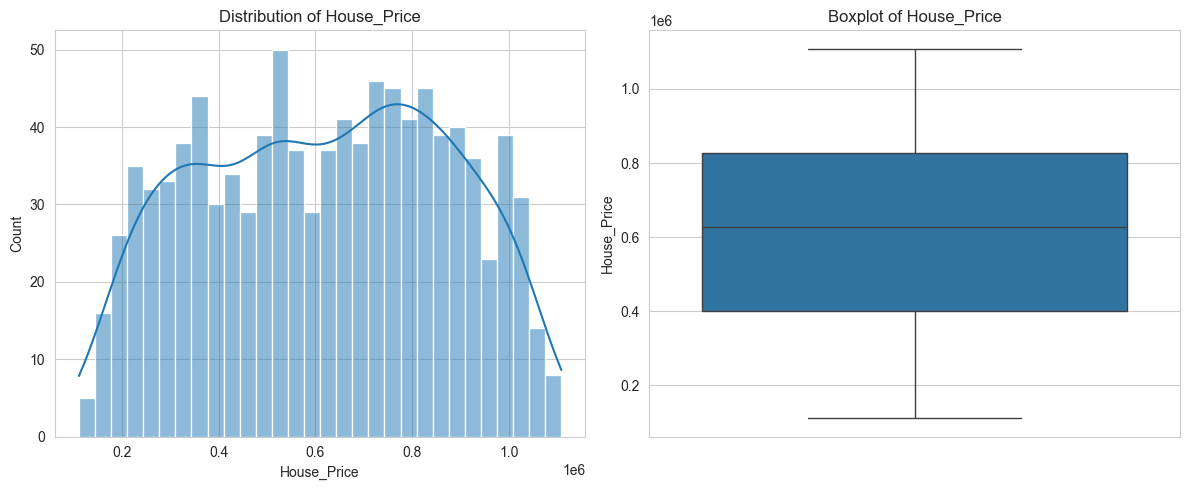

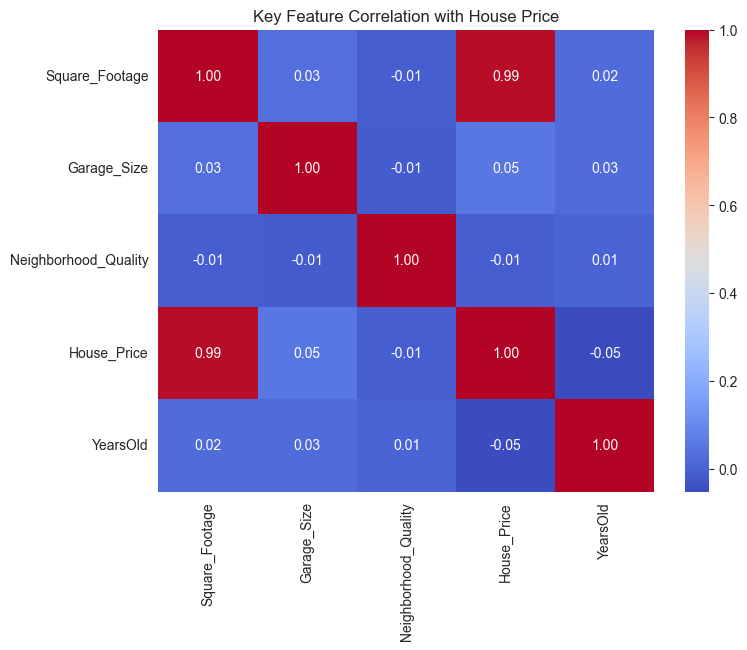

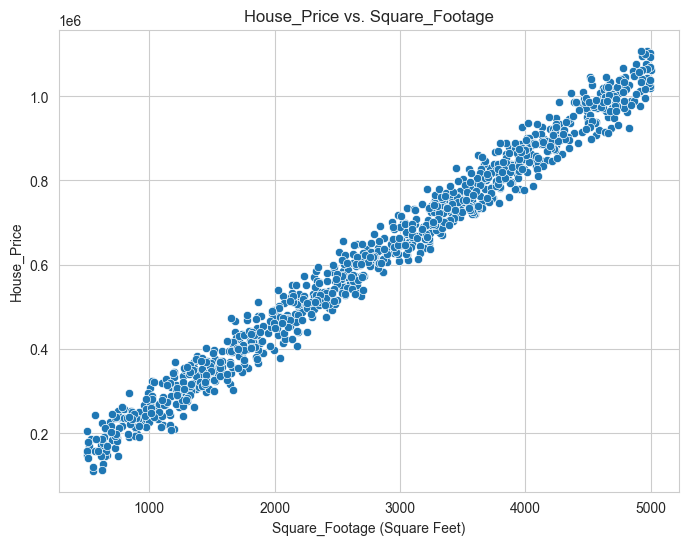


--- Challenge: Skewness Analysis ---
Skewness before log transformation: -0.06
House Price is not highly skewed. Skipping log transformation.


In [9]:
# Define the actual column names from your dataset
PRICE_COL = 'House_Price'
SIZE_COL = 'Square_Footage'
YEAR_BUILT_COL = 'Year_Built'
QUALITY_COL = 'Neighborhood_Quality'

# Use the existing df DataFrame (assumed to be loaded and named 'df')
df_clean = df.copy()

# 1. Feature Engineering: Create Years Old
# Get the current year (or a reference year if specified)
current_year = pd.Timestamp.now().year

if YEAR_BUILT_COL in df_clean.columns:
    df_clean['YearsOld'] = current_year - df_clean[YEAR_BUILT_COL]
    print(f"\n'YearsOld' feature created using current year ({current_year}).")
else:
    print(f"\nCould not create 'YearsOld'. Column '{YEAR_BUILT_COL}' not found.")

# The dataset is confirmed to have no missing values, so we skip imputation.
print("\n--- Remaining Missing Value Check (Should be empty) ---")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
print("\n--- Starting EDA ---")

# 2. Target Variable Analysis (House_Price)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean[PRICE_COL], kde=True, bins=30)
plt.title(f'Distribution of {PRICE_COL}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean[PRICE_COL])
plt.title(f'Boxplot of {PRICE_COL}')
plt.tight_layout()
plt.show()
# 


# 3. Correlation Analysis (Top 10 features, focusing on quality and size)
numerical_df = df_clean.select_dtypes(include=np.number)
if PRICE_COL in numerical_df.columns:
    correlation_matrix = numerical_df.corr()
    
    # Get features most correlated with price, including the quality and size columns
    top_features = numerical_df.columns.intersection([PRICE_COL, SIZE_COL, QUALITY_COL, 'YearsOld', 'Garage_Size'])
    
    # Ensure there are at least 4 features for a decent heatmap
    if len(top_features) >= 4:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df_clean[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Key Feature Correlation with House Price')
        plt.show()
        # 
    else:
        print("Not enough key features found for a robust correlation heatmap.")
else:
    print(f"Error: Target column '{PRICE_COL}' not found in numerical features for correlation.")


# 4. Key Feature Relationship Plot (Square Footage vs. Price)
if SIZE_COL in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_clean[SIZE_COL], y=df_clean[PRICE_COL], data=df_clean)
    plt.title(f'{PRICE_COL} vs. {SIZE_COL}')
    plt.xlabel(f'{SIZE_COL} (Square Feet)')
    plt.ylabel(PRICE_COL)
    plt.show()

# 5. Addressing Challenge: Skewness and Transformation
original_skew = df_clean[PRICE_COL].skew()
print(f"\n--- Challenge: Skewness Analysis ---")
print(f"Skewness before log transformation: {original_skew:.2f}")

# Solution: Apply Log Transformation if skew is significant (e.g., > 0.5)
if original_skew > 0.5:
    df_clean['House_Price_Log'] = np.log1p(df_clean[PRICE_COL])
    transformed_skew = df_clean['House_Price_Log'].skew()
    print(f"Skewness after log transformation: {transformed_skew:.2f} (Solution for modeling stability)")

    # Visualize the result
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[PRICE_COL], bins=30, kde=True)
    plt.title('Original Price Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(df_clean['House_Price_Log'], bins=30, kde=True)
    plt.title('Log-Transformed Price Distribution')
    plt.tight_layout()
    plt.show()
else:
    print("House Price is not highly skewed. Skipping log transformation.")
